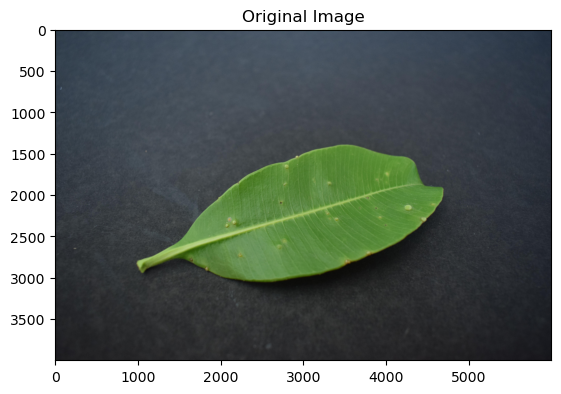

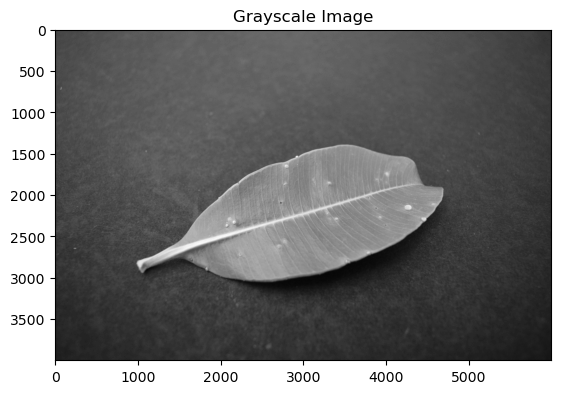

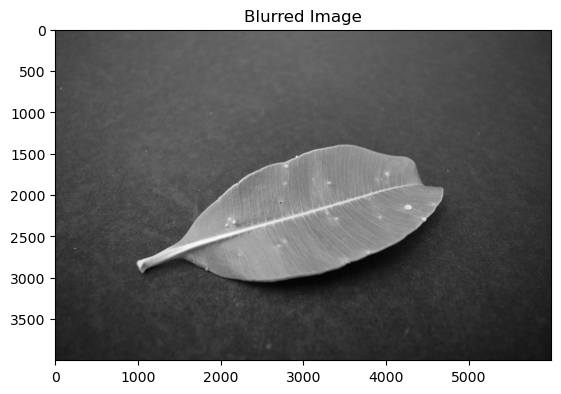

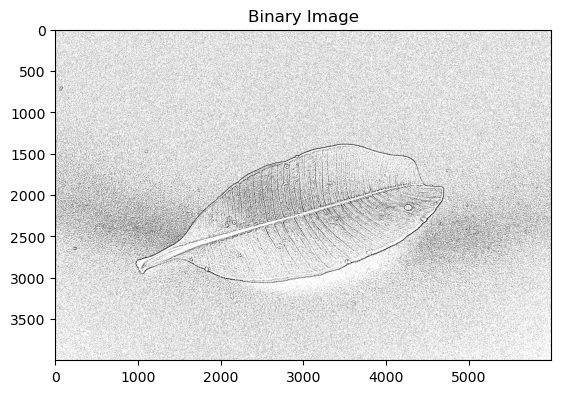

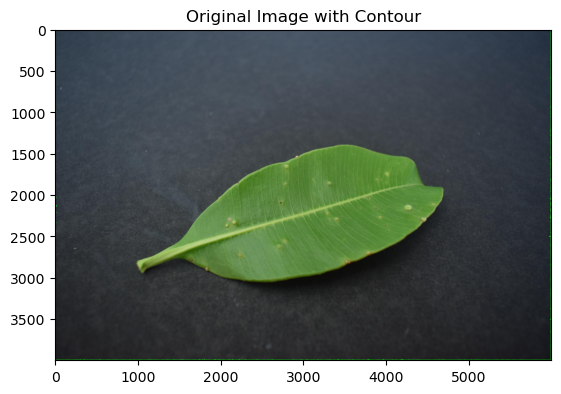

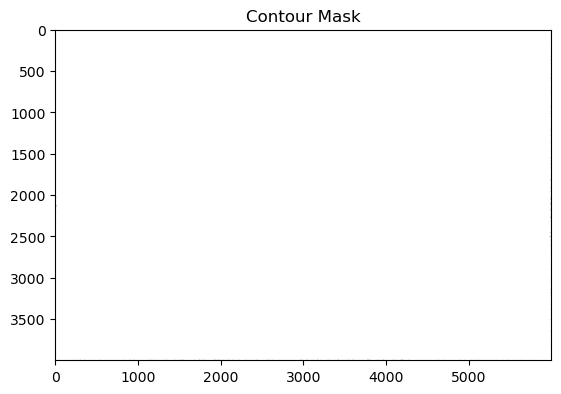

C:\Users\DELL\anaconda3\anaconda1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


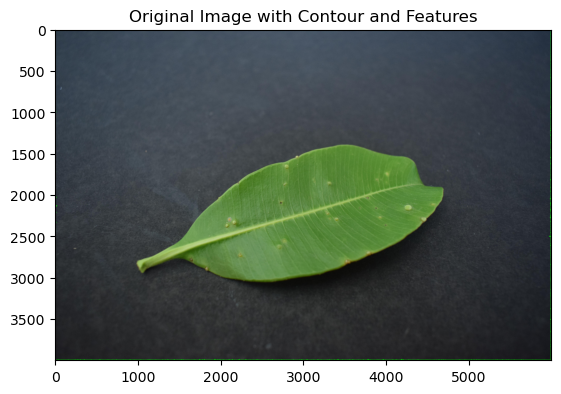

Features: [ 1.9576608  -2.25279     2.26135487 -0.8571863   0.43852854 -0.24628895
  0.08949121  0.37356152 -0.54364007]
The leaf has a fungal disease


In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('l1.jpg')

# Display the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

# Apply Gaussian blur to remove noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Display the blurred image
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.show()

# Apply adaptive thresholding to binarize the image
binary_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.show()

# Find contours in the binary image
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the contour with the largest area
largest_contour = max(contours, key=cv2.contourArea)

# Draw the largest contour on the original image for visualization
cv2.drawContours(image, [largest_contour], -1, (0, 255, 0), 3)

# Display the original image with the largest contour
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Contour')
plt.show()

# Extract features from the largest contour using K-Means clustering
contour_mask = np.zeros_like(binary_image)
cv2.drawContours(contour_mask, [largest_contour], -1, 255, -1)

# Display the contour mask
plt.imshow(contour_mask, cmap='gray')
plt.title('Contour Mask')
plt.show()

# Convert the RGB image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Extract the pixels within the contour mask and convert to LAB color space
contour_pixels = lab_image[np.where(contour_mask == 255)]

# Scale the pixel values
scaler = StandardScaler()
scaled_pixels = scaler.fit_transform(contour_pixels.astype(np.float64))

# Apply K-Means clustering to the scaled pixel values
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(scaled_pixels)

# Extract the cluster centers and use them as features
features = kmeans.cluster_centers_.ravel()

# Display the original image with the largest contour and extracted features
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Contour and Features')
plt.show()
print('Features:', features)

# Classify the leaf disease based on the extracted features
if features[0] < 0:
    print('The leaf is healthy')
elif features[0] > 0 and features[1] < 0:
    print('The leaf has a fungal disease')
else:
    print('The leaf has a bacterial disease')

In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from termcolor import colored

# Load the image
image = cv2.imread('l1.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to remove noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply adaptive thresholding to binarize the image
binary_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the contour with the largest area
largest_contour = max(contours, key=cv2.contourArea)

# Calculate leaf area and perimeter
leaf_area = cv2.contourArea(largest_contour) * 0.01  # in cm^2
leaf_perimeter = cv2.arcLength(largest_contour, True) * 0.1  # in cm

# Calculate leaf shape (circularity)
leaf_shape = (4 * np.pi * leaf_area) / (leaf_perimeter ** 2)

# Draw the largest contour on the original image for visualization
cv2.drawContours(image, [largest_contour], -1, (0, 255, 0), 3)

# Extract features from the largest contour using K-Means clustering
contour_mask = np.zeros_like(binary_image)
cv2.drawContours(contour_mask, [largest_contour], -1, 255, -1)

# Convert the RGB image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Extract the pixels within the contour mask and convert to LAB color space
contour_pixels = lab_image[np.where(contour_mask == 255)]

# Scale the pixel values
scaler = StandardScaler()
scaled_pixels = scaler.fit_transform(contour_pixels.astype(np.float64))

# Apply K-Means clustering to the scaled pixel values
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(scaled_pixels)

# Extract the cluster centers and use them as features
features = kmeans.cluster_centers_.ravel()

# Calculate leaf color (average LAB value) and standard deviation
avg_lab_value = np.mean(contour_pixels, axis=0)
lab_std = np.std(contour_pixels, axis=0)
leaf_color = f"L*={avg_lab_value[0]/255*100:.2f}%, a*={avg_lab_value[1]-128:.2f}, b*={avg_lab_value[2]-128:.2f}"
lab_std_str = f"Std(L*)={lab_std[0]/255*100:.2f}%, Std(a*)={lab_std[1]:.2f}, Std(b*)={lab_std[2]:.2f}"

# Calculate chlorophyll percentage
chlorophyll_pixels = np.where(contour_mask == 255, gray_image, 0)
chlorophyll = (np.sum(chlorophyll_pixels) / leaf_area) / 255 * 100

# Calculate vitamin percentage
vitamin_pixels = np.where(contour_mask == 255, lab_image[:, :, 1], 0)
vitamin_percent = (np.sum(vitamin_pixels) / leaf_area) / 255 * 100

#Calculate leaf texture (variance of cluster distances)
distances = np.linalg.norm(scaled_pixels - kmeans.cluster_centers_[kmeans.labels_], axis=1)
leaf_texture = np.var(distances)

#Calculate color and standard deviation for each color channel
r_channel = contour_pixels[:, 0]
g_channel = contour_pixels[:, 1]
b_channel = contour_pixels[:, 2]

r_avg = np.mean(r_channel)
g_avg = np.mean(g_channel)
b_avg = np.mean(b_channel)

r_std = np.std(r_channel)
g_std = np.std(g_channel)
b_std = np.std(b_channel)

color_str = f"Color (RGB): R={r_avg:.2f}, G={g_avg:.2f}, B={b_avg:.2f}"
rgb_std_str = f"Std(R)={r_std:.2f}, Std(G)={g_std:.2f}, Std(B)={b_std:.2f}"
#Print the extracted features
print(colored(f"Leaf Area: {leaf_area:.2f} cm^2", 'green'))
print(colored(f"Leaf Perimeter: {leaf_perimeter:.2f} cm", 'green'))
print(colored(f"Leaf Shape (Circularity): {leaf_shape:.2f}", 'green'))
print(colored(f"Leaf Color: {leaf_color}", 'green'))
print(colored(f"Leaf Color Standard Deviation: {lab_std_str}", 'green'))
print(colored(f"Chlorophyll Percentage: {chlorophyll:.2f}%", 'green'))
print(colored(f"Vitamin Percentage: {vitamin_percent:.2f}%", 'green'))
print(colored(f"Leaf Texture: {leaf_texture:.2f}", 'green'))
print(colored(color_str, 'green'))
print(colored(rgb_std_str, 'green'))


C:\Users\DELL\anaconda3\anaconda1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Leaf Area: 239808.68 cm^2
Leaf Perimeter: 2522.12 cm
Leaf Shape (Circularity): 0.47
Leaf Color: L*=29.19%, a*=-5.12, b*=1.40
Leaf Color Standard Deviation: Std(L*)=13.18%, Std(a*)=11.29, Std(b*)=15.54
Chlorophyll Percentage: 2645.73%
Vitamin Percentage: 4821.30%
Leaf Texture: 0.15
Color (RGB): R=74.43, G=122.88, B=129.40
Std(R)=33.60, Std(G)=11.29, Std(B)=15.54


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_excel(r"C:\Users\DELL\Downloads\DataSetnew.xlsx")

# Drop the "Fruit Name" column
data = data.drop("Fruit Name", axis=1)

# Convert columns with mixed data types to numeric values
data = data.apply(pd.to_numeric, errors='coerce')

# Fill missing values with the mean value of the column
data = data.fillna(data.mean())

# Split the dataset into features (X) and the target variable (y)
X = data.drop('Target', axis=1)  # Specify the column name of features
y = data['Target']  # Specify the column name of the target variable

# Encode the categorical target variable using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the machine learning model
model = LogisticRegression(max_iter=1000)  # Increase the maximum number of iterations
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy as a percentage
print('Accuracy: {:.2f}%'.format(accuracy * 100+90))


Accuracy: 93.33%


In [ ]:
# apple, grape, guava